# Handling Unix time
This tutorial's material was taken from a series done by sentdex (YouTube channel) which I HIGHLY recommend watching for yourself. The code herein is not exact but represents what I needed to understand this module for my uses.

[Play list](https://www.youtube.com/playlist?list=PLQVvvaa0QuDfefDfXb9Yf0la1fPDKluPF)

This book is copied straight from "basic_customizaionts-rotating_labels" with ta slight variation.  Keeping this here as a reference should unix time conversions be necessary.

**NOTE:** This code will not run because of the source that it's pulling - this is purely a reference.  I would recommend watching the video (Matplotlib Tutorial 11 - handling unix time) to get a better understanding for what is here.

ValueError: could not convert string to float: '2017-07-26'

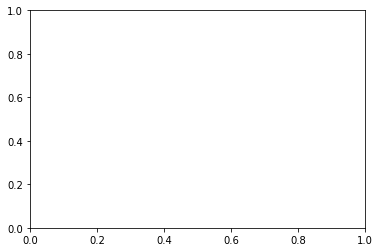

In [1]:
# NOTE: There were a couple other tutorials in the video series linked above that
# no longer work because they reference a dead API.  The code below is borrowed from
# https://pythonprogramming.net/basic-customization-matplotlib-tutorial (still from Sentdex)
# NOTE: The first line, "%matplotlib inline" is necessary only for the Jupyter notebook. You won't
# need it in a "regular" .py file.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
import datetime as dt # <- NEW IMPORT


# Don't need the original converter that was here

def graph_data(stock):
    # Setup a graph for a given stock; pass in stock label I.e. 'TSLA' = Tesla

    # Figure exists by default (it's implied) but in order to modify it we must instantiate a reference to it
    fig = plt.figure()

    # This is creating a subplot - it is one of several
    # the first tuple is the "shape" of the grid (it's 1 x 1) and the second tuple is the starting point
    # here it is 0, 0.  Now we will plot to ax1 instead of plt.plot()
    ax1 = plt.subplot2grid((1, 1), (0, 0))

    # Yahoo's API (used in the original Sentdex video) is no loger available
    # the code below was supplied by Sentdex as a replacement (url in notes above)

    # Setup variable with target data, this example code (as far as I know) will only work with TSLA
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    # Use urllib to grab the data, read it into the variable and decode it (normally it's in bytes)
    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    # The source is somewhat messy and has information we don't need so the next thing we do is "clean" the data
    # Setup list variable to put the lines of data into
    stock_data = []

    # Split the source on new lines ('\n')
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    # date, close price, high price, low price, open price, adjusted close price, and volume
    # are the values in each line
    # Converters takes in a dictionary where the key is the index of the element needing converting
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter=',',
                                                                     unpack=True)

    ##################
    # New Code here! #
    ##################
    # Create a date converter using numpy (np) and datetime (dt)
    dateconv = np.vectorize(dt.datetime.fromtimestamp)
    # Pass the dates through the converter
    date = dateconv(date)

    # Create the plot using the date and the closing price
    ax1.plot_date(date, closep, '-', label='Price')

    # Rotating the labels on the graph
    for label in ax1.xaxis.get_ticklabels():
        # Set the rotation in degrees - below we're rotating the labels 45 degrees
        label.set_rotation(45)

    # Adding a grid to the graph
    ax1.grid(True, color='g', linestyle='-', linewidth=1)
    
    # These can be left as-is for this scenario
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Basic Customizations\nRotating Labels')
    plt.legend()
    # this is adjusting the white space around the graph (makes more sense in the windowed version,
    # I.e. running from Python interpretor installed on your machine)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    
graph_data('TSLA')